<a href="https://colab.research.google.com/github/sadidoll/Artifical-Interlligence/blob/master/HW_2/Hw2_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem 2:**
Extend the code for mini-batch gradient descent in the notebook linear_regression_gradient_descent.ipynb to the case n=2, that is, the model parameters are the two weights w1 and w2 and the bias term b. (You can remove the code for batch-gradient descent and stochastic gradient descent.) Make sure that your code is vectorized.

To solve this problem, you have to create data points that approximately lie on a 2D plane, display these points, and display the predictions of your model after tuning the parameters with gradient descent.

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
# generate m random pairs (x_1, x_2, y)

m = 100
X_1 = 2 * np.random.rand(m, 1)
X_2 = 2 * np.random.rand(m, 1)
y = (4 + 3 * X_1) + (2 + 2 * X_2) + np.random.rand(m, 1)

###**Combine bias $b = w_{0}$ and weight $w_{1}$ and weight $w_{2}$**
Linear regression predicts $\hat{y}=b + w_1 x_1$ + $w_{2} x_{2}$. It will be convenient to rewrite this as a dot product. Define $w=(w_0, w_1, w_2)$ and $x=(1, x_1, x_2)$. Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [0]:
# Add x0 = 1
X_b = np.column_stack([np.ones((m, 1)), X_1, X_2])

# Number of epchos
epochs = 20
# batch size
batch_size = 4
#learning rate
lr = 0.01

# Fix initial random weight for gradient descent (mini batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1)

###**Plotting the training Data:**

Text(0.5, 0, 'y')

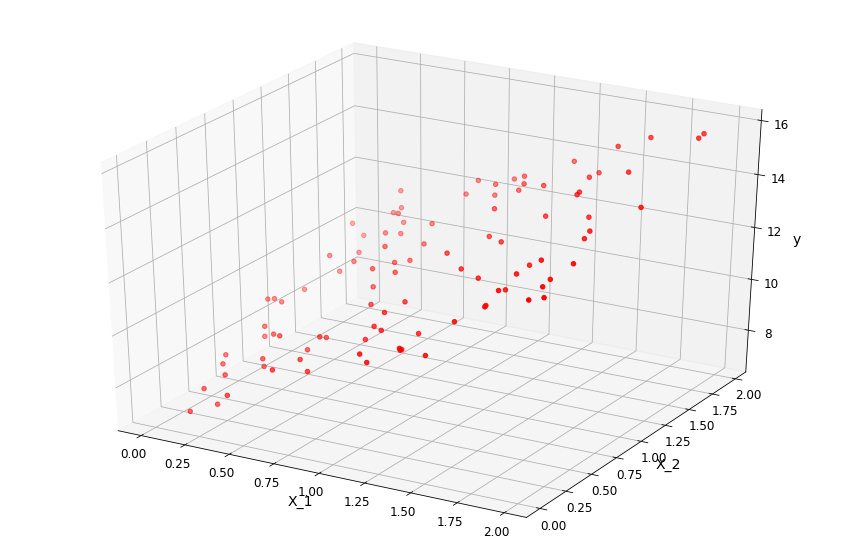

In [57]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection='3d')
ax.scatter(X_1, X_2, y, c='red')
ax.set_xlabel('X_1', fontsize = 14)
ax.set_ylabel('X_2', fontsize = 14)
ax.set_zlabel('y', fontsize = 14)

###**Mini batch Gradient Descent:**

In [0]:
weight = initial_weight
weight_path_mgd = []

weight_path_mgd.append(weight)
for epoch in range(epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, m, batch_size):
    xi = X_b_shuffled[i:i+batch_size]
    yi = y_shuffled[i:i+batch_size]
    gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
    weight = weight - lr * gradient
    weight_path_mgd.append(weight)


In [40]:
weight_path_mgd[-1]

array([[4.92873879],
       [3.57129197],
       [2.8876514 ]])

In [0]:
weight_path_mgd = np.array(weight_path_mgd)

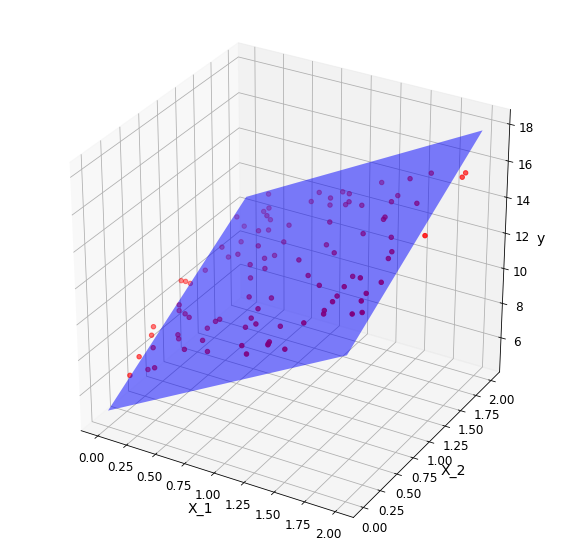

In [55]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_1, X_2, y, c='red')
ax.set_xlabel('X_1', fontsize = 14)
ax.set_ylabel('X_2', fontsize = 14)
ax.set_zlabel('y', fontsize = 14)

# plot final prediction on the graph
Xs1 = np.linspace(0, 2, 2)
Xs2 = np.linspace(0, 2, 2)
Xs1, Xs2 = np.meshgrid(Xs1, Xs2)

y_pred = weight[0] + (weight[1] * Xs1) + (weight[2] * Xs2)
ax.plot_surface(Xs1, Xs2, y_pred, color = 'blue', alpha = 0.5)

source:
https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb